### Persistence Asymmetry

The model is simulated under high skepticism ($\theta=0.75$) until $t=30$, after
which the interpretive environment improves ($\theta=0.25$). Distrust declines
slowly due to asymmetric persistence ($\mu < \delta$), producing long-tailed
decay even after conditions improve.


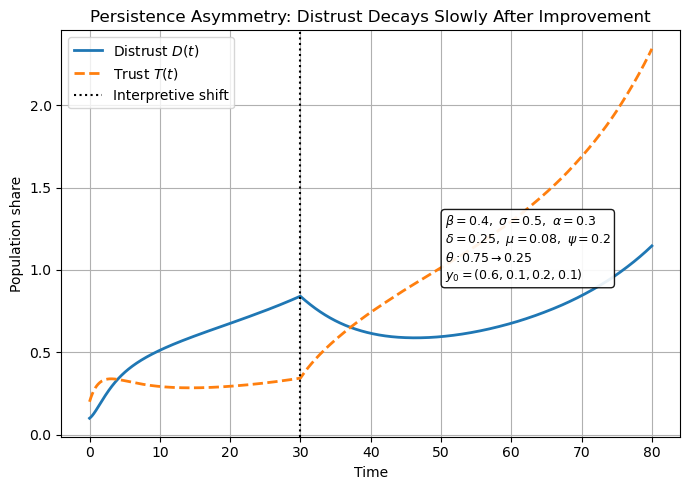

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed structural parameters
# -----------------------------
beta = 0.4
sigma = 0.5
alpha = 0.3
delta = 0.25     # Trust recovers relatively quickly
mu = 0.08        # Distrust decays slowly (persistence asymmetry)
psi = 0.2

# -----------------------------
# Time settings
# -----------------------------
t_eval = np.linspace(0, 80, 1600)

# -----------------------------
# Phase 1: High-skepticism environment
# -----------------------------
theta_high = 0.75
t_span_1 = (0, 30)
y0 = [0.6, 0.1, 0.2, 0.1]

sol1 = solve_ivp(
    trust_model,
    t_span_1,
    y0,
    args=(beta, sigma, alpha, delta, mu, psi, theta_high),
    t_eval=t_eval[t_eval <= 30]
)

# -----------------------------
# Phase 2: Improved interpretive environment
# -----------------------------
theta_low = 0.25
t_span_2 = (30, 80)

sol2 = solve_ivp(
    trust_model,
    t_span_2,
    sol1.y[:, -1],
    args=(beta, sigma, alpha, delta, mu, psi, theta_low),
    t_eval=t_eval[t_eval > 30]
)

# -----------------------------
# Combine solutions
# -----------------------------
t = np.concatenate([sol1.t, sol2.t])
D = np.concatenate([sol1.y[3], sol2.y[3]])
T = np.concatenate([sol1.y[2], sol2.y[2]])

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(7,5))
plt.plot(t, D, label="Distrust $D(t)$", linewidth=2)
plt.plot(t, T, linestyle="--", label="Trust $T(t)$", linewidth=2)

plt.axvline(30, linestyle=":", color="black", label="Interpretive shift")


param_text = (
    r"$\beta=0.4,\ \sigma=0.5,\ \alpha=0.3$" "\n"
    r"$\delta=0.25,\ \mu=0.08,\ \psi=0.2$" "\n"
    r"$\theta: 0.75 \rightarrow 0.25$" "\n"
    r"$y_0=(0.6,0.1,0.2,0.1)$"
)

plt.gca().text(
    0.62, 0.55, param_text,
    transform=plt.gca().transAxes,
    fontsize=9,
    verticalalignment="top",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.9)
)


plt.xlabel("Time")
plt.ylabel("Population share")
plt.title("Persistence Asymmetry: Distrust Decays Slowly After Improvement")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Persistence Asymmetry

The model is simulated under high skepticism ($\theta=0.75$) until $t=30$, after
which the interpretive environment improves ($\theta=0.25$). Distrust declines
slowly due to asymmetric persistence ($\mu < \delta$), producing long-tailed
decay even after conditions improve.


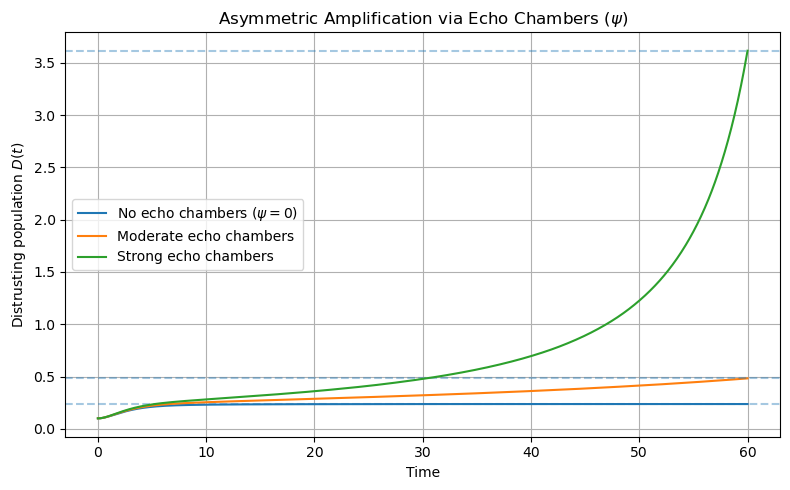

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed parameters (baseline democracy)
# -----------------------------
beta = 0.4
sigma = 0.5
alpha = 0.3
delta = 0.2
mu = 0.15
theta = 0.5        # fixed interpretive environment

# -----------------------------
# Echo chamber scenarios (psi)
# -----------------------------
psi_values = [
    (0.0, "No echo chambers ($\\psi=0$)"),
    (0.2, "Moderate echo chambers"),
    (0.4, "Strong echo chambers")
]

# -----------------------------
# Initial condition (neutral-heavy)
# -----------------------------
y0 = [0.7, 0.05, 0.15, 0.10]

# -----------------------------
# Time settings
# -----------------------------
t_span = (0, 60)
t_eval = np.linspace(*t_span, 1200)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(8,5))

for psi, label in psi_values:
    sol = solve_ivp(
        trust_model,
        t_span,
        y0,
        args=(beta, sigma, alpha, delta, mu, psi, theta),
        t_eval=t_eval
    )

    plt.plot(sol.t, sol.y[3], label=label)
    plt.axhline(sol.y[3][-1], linestyle="--", alpha=0.4)

# -----------------------------
# Formatting
# -----------------------------
plt.xlabel("Time")
plt.ylabel("Distrusting population $D(t)$")
plt.title("Asymmetric Amplification via Echo Chambers ($\\psi$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


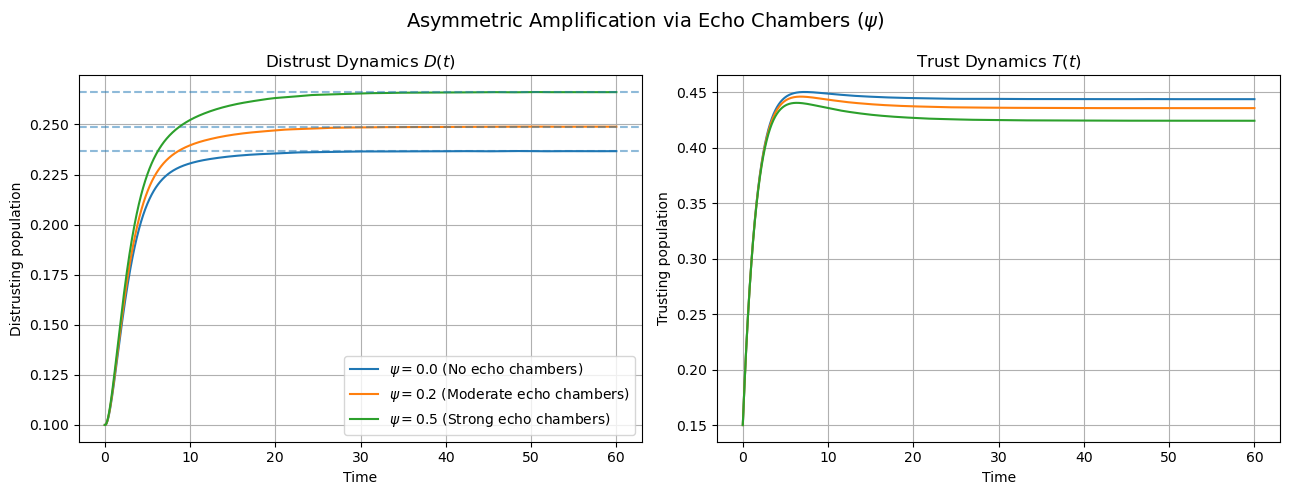

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# Model definition
# -----------------------------
def trust_model(t, y, beta, sigma, alpha, delta, mu, psi, theta):
    S, E, T, D = y

    dSdt = -(beta + alpha) * S + delta * T + mu * D - psi * D * S
    dEdt = beta * S + psi * D * S - sigma * E
    dTdt = (1 - theta) * sigma * E + alpha * S - delta * T
    dDdt = theta * sigma * E - mu * D

    return [dSdt, dEdt, dTdt, dDdt]

# -----------------------------
# Fixed parameters (baseline democracy)
# -----------------------------
beta  = 0.4
sigma = 0.5
alpha = 0.3
delta = 0.2
mu    = 0.15
theta = 0.5   # fixed interpretive environment

# -----------------------------
# Echo chamber strength
# -----------------------------
psi_values = [
    (0.0, "No echo chambers"),
    (0.2, "Moderate echo chambers"),
    (0.5, "Strong echo chambers")
]

# -----------------------------
# Initial condition (neutral-heavy)
# -----------------------------
y0 = [0.7, 0.05, 0.15, 0.10]

# -----------------------------
# Time settings
# -----------------------------
t_span = (0, 60)
t_eval = np.linspace(*t_span, 1200)

# -----------------------------
# Plot
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(13, 5), sharex=True)

for psi, label in psi_values:
    sol = solve_ivp(
        trust_model,
        t_span,
        y0,
        args=(beta, sigma, alpha, delta, mu, psi, theta),
        t_eval=t_eval
    )

    # Distrust dynamics
    axes[0].plot(sol.t, sol.y[3], label=rf"$\psi={psi}$ ({label})")
    axes[0].axhline(sol.y[3][-1], linestyle="--", alpha=0.5)

    # Trust dynamics
    axes[1].plot(sol.t, sol.y[2], label=rf"$\psi={psi}$")

# -----------------------------
# Formatting
# -----------------------------
axes[0].set_title("Distrust Dynamics $D(t)$")
axes[0].set_ylabel("Distrusting population")
axes[0].grid(True)

axes[1].set_title("Trust Dynamics $T(t)$")
axes[1].set_ylabel("Trusting population")
axes[1].grid(True)

for ax in axes:
    ax.set_xlabel("Time")

axes[0].legend()
plt.suptitle("Asymmetric Amplification via Echo Chambers ($\\psi$)", fontsize=14)
plt.tight_layout()
plt.show()
